In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
# import lightgbm as lgb  # Optional: install with pip if needed
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("1- mental-illnesses-prevalence.csv")
df

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [9]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 6150 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6150 non-null   int32  
 1   Code                                                                               6150 non-null   int32  
 2   Year                                                                               6150 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6150 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6150 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6150 non-null   float64
 6 

Entity                                                                               0
Code                                                                                 0
Year                                                                                 0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           0
dtype: int64

In [13]:
# Rename long columns for convenience
df.columns = ['Entity', 'Code', 'Year', 'Schizophrenia', 'Depression', 'Anxiety', 'Bipolar', 'Eating']

# Drop rows with missing 'Code' (mostly aggregate rows like 'World')
df.dropna(subset=['Code'], inplace=True)


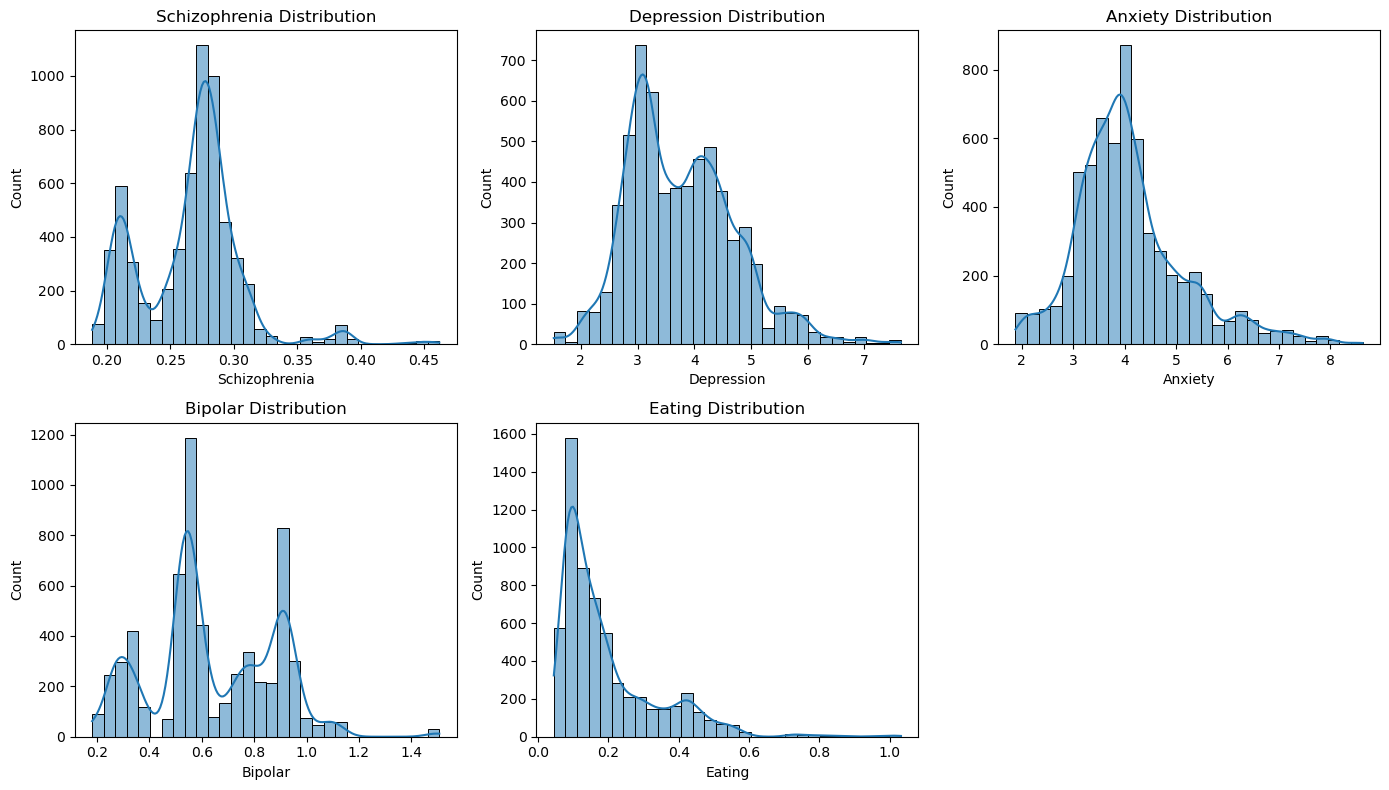

In [15]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(df.columns[3:]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


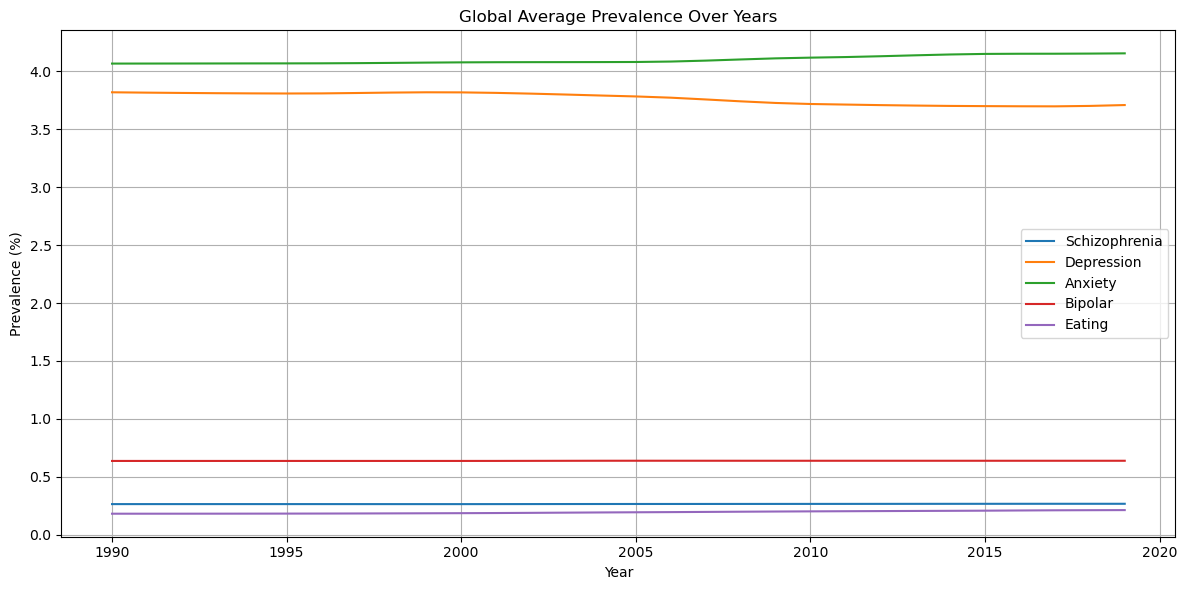

In [17]:
yearly_avg = df.groupby("Year")[['Schizophrenia', 'Depression', 'Anxiety', 'Bipolar', 'Eating']].mean()

plt.figure(figsize=(12, 6))
for col in yearly_avg.columns:
    plt.plot(yearly_avg.index, yearly_avg[col], label=col)
plt.legend()
plt.title("Global Average Prevalence Over Years")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


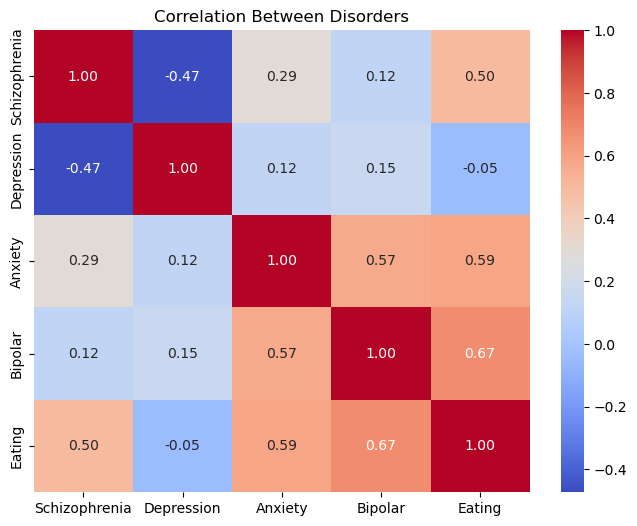

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, 3:].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Disorders")
plt.show()


In [21]:
print("Duplicates:", df.duplicated().sum())


Duplicates: 0


In [23]:
from sklearn.preprocessing import LabelEncoder

le_entity = LabelEncoder()
le_code = LabelEncoder()

df['Entity'] = le_entity.fit_transform(df['Entity'])
df['Code'] = le_code.fit_transform(df['Code'])


In [25]:
from sklearn.preprocessing import StandardScaler

X = df[['Entity', 'Code', 'Year']]
y = df[['Schizophrenia', 'Depression', 'Anxiety', 'Bipolar', 'Eating']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Training Samples: 4920
Testing Samples: 1230


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb


In [47]:
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)
result = evaluate_model("Linear Regression", model, X_test, y_test)
print(result)


{'Model': 'Linear Regression', 'R2 Score': 0.030478168678383443, 'MAE': 0.37628741715374053, 'RMSE': 0.6553819614843635}


In [37]:
results = []

# 1. Linear Regression
lr = MultiOutputRegressor(LinearRegression())
lr.fit(X_train, y_train)
results.append(evaluate_model("Linear Regression", lr, X_test, y_test))

# 2. Random Forest
rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf.fit(X_train, y_train)
results.append(evaluate_model("Random Forest", rf, X_test, y_test))

# 3. Support Vector Regressor
svr = MultiOutputRegressor(SVR())
svr.fit(X_train, y_train)
results.append(evaluate_model("Support Vector Regressor", svr, X_test, y_test))

# 4. K-Nearest Neighbors
knn = MultiOutputRegressor(KNeighborsRegressor())
knn.fit(X_train, y_train)
results.append(evaluate_model("K-Nearest Neighbors", knn, X_test, y_test))

# 5. MLP Regressor
mlp = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
mlp.fit(X_train, y_train)
results.append(evaluate_model("MLP Regressor", mlp, X_test, y_test))

# 6. XGBoost
xgboost = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, random_state=42))
xgboost.fit(X_train, y_train)
results.append(evaluate_model("XGBoost", xgboost, X_test, y_test))



In [38]:
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False).reset_index(drop=True)
print(results_df)


                      Model  R2 Score       MAE      RMSE
0             Random Forest  0.999565  0.005184  0.018628
1                   XGBoost  0.997675  0.017117  0.039219
2       K-Nearest Neighbors  0.126814  0.348369  0.630660
3             MLP Regressor  0.051341  0.370002  0.644713
4         Linear Regression  0.030478  0.376287  0.655382
5  Support Vector Regressor -0.042899  0.367167  0.663564


C:\Users\charv\AppData\Local\Temp\ipykernel_31988\4121965300.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2 Score", palette="viridis")


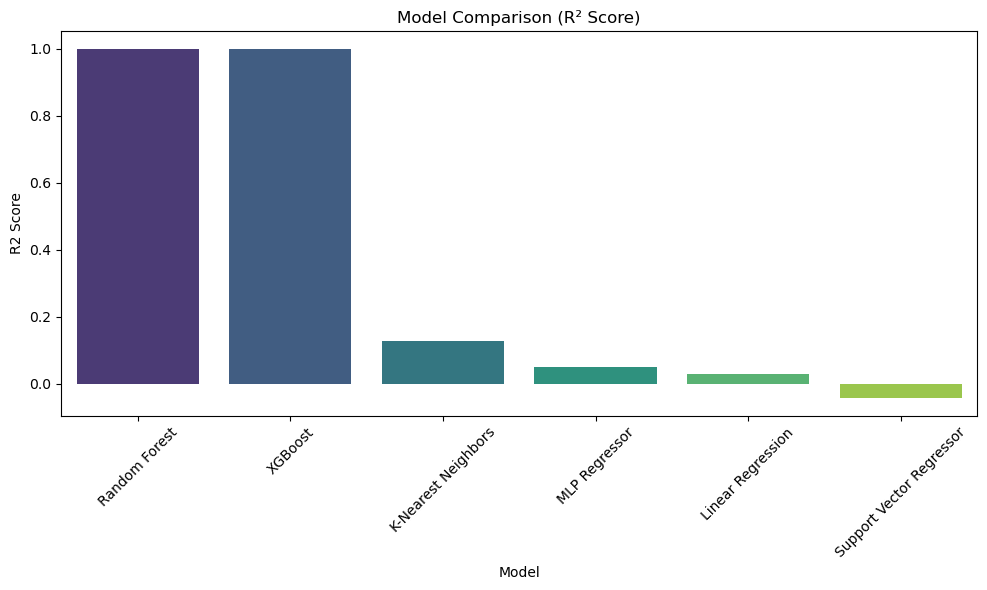

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="R2 Score", palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Comparison (R² Score)")
plt.tight_layout()
plt.show()


In [45]:
import joblib
joblib.dump(rf, "best_model.pkl")  # Replace 'rf' with your top performer


['best_model.pkl']